In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Data Manip
import numpy as np
import pandas as pd

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


## 1. Chargement du dataset et preparation des données pour ML

### 1.1 Chargement du dataset

In [3]:
shp = pd.read_csv("../transformed\student_habits_performance.csv")
shp.head()

,id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### 1.2 Data Manipulation pour les variables catégorielles

In [5]:
shpml = pd.get_dummies(shp)
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [6]:
y = shpml.exam_score
X = shpml.drop(columns = ["id", "exam_score"])
X.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'gender_Female', 'gender_Male', 'gender_Other',
       'part_time_job_No', 'part_time_job_Yes', 'diet_quality_Fair',
       'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

## 2. Modèles de regression linéaire

### 2.1 Regression linéaire classique

In [7]:
reg_lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
reg_lin.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = reg_lin.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.189311054627606 ; MSE: 26.476236454969193 ; RMSE: 5.14550643328421


In [11]:
reg_lin.score(X_test, y_test)

0.89675026403802

##### Le coeff de détermination est de 0.9, et donc semble plutôt bon avec ce modèle basique de régression linéaire
Nous allons maintenant investiguer les différentes valeurs des paramètres de la régression pour les différentes variables

In [12]:
for i in range(len(reg_lin.coef_)):

    print("Feature:", X.columns[i], ";", "coeff:", reg_lin.coef_[i])


Feature: age ; coeff: 0.052380081594701026
Feature: study_hours_per_day ; coeff: 9.531532014587434
Feature: social_media_hours ; coeff: -2.6850044855290873
Feature: netflix_hours ; coeff: -2.3215307151083535
Feature: attendance_percentage ; coeff: 0.1445076942016557
Feature: sleep_hours ; coeff: 1.9764071904681215
Feature: exercise_frequency ; coeff: 1.3196459241560452
Feature: mental_health_rating ; coeff: 1.9528562272570462
Feature: gender_Female ; coeff: -0.31500178615494856
Feature: gender_Male ; coeff: -0.18070542270967027
Feature: gender_Other ; coeff: 0.495707208864619
Feature: part_time_job_No ; coeff: -0.18546060417818414
Feature: part_time_job_Yes ; coeff: 0.1854606041781843
Feature: diet_quality_Fair ; coeff: 0.5015559802492435
Feature: diet_quality_Good ; coeff: -0.4567995977523904
Feature: diet_quality_Poor ; coeff: -0.04475638249685253
Feature: parental_education_level_Bachelor ; coeff: 0.49768560499329134
Feature: parental_education_level_High School ; coeff: 0.045154436

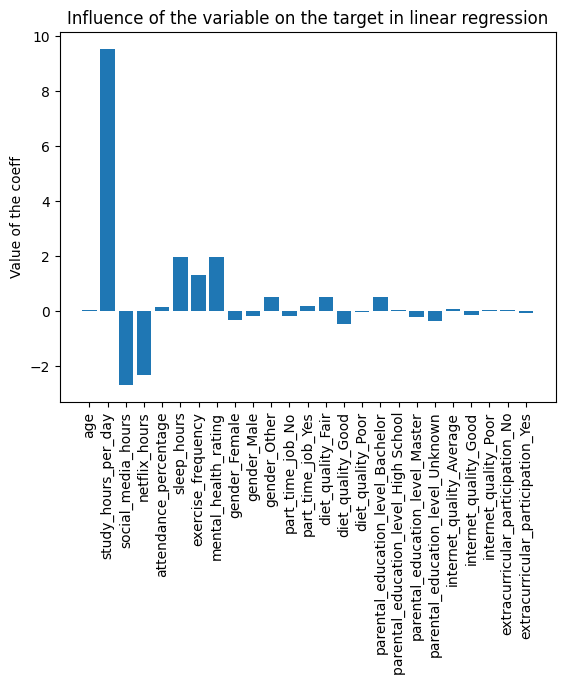

In [13]:
plt.bar(X.columns, reg_lin.coef_)
plt.xticks(rotation=90)
plt.ylabel("Value of the coeff")
plt.title("Influence of the variable on the target in linear regression")
plt.show()

In [14]:
total_abs_coeff = sum(abs(reg_lin.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_lin.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_lin.coef_[i])/total_abs_coeff})

print(feature_coeff)

def select_coeff(x):
    return x["coeff"]
print(select_coeff(feature_coeff[1]))
print(sorted(feature_coeff, reverse=True, key=select_coeff))
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)



23.824337127098143
[{'feature': 'age', 'coeff': np.float64(0.002198595550225117)}, {'feature': 'study_hours_per_day', 'coeff': np.float64(0.40007543394548983)}, {'feature': 'social_media_hours', 'coeff': np.float64(0.11270007099064783)}, {'feature': 'netflix_hours', 'coeff': np.float64(0.09744366454871103)}, {'feature': 'attendance_percentage', 'coeff': np.float64(0.00606554941825813)}, {'feature': 'sleep_hours', 'coeff': np.float64(0.0829574892230738)}, {'feature': 'exercise_frequency', 'coeff': np.float64(0.05539066699383888)}, {'feature': 'mental_health_rating', 'coeff': np.float64(0.08196896378853871)}, {'feature': 'gender_Female', 'coeff': np.float64(0.013221848921733944)}, {'feature': 'gender_Male', 'coeff': np.float64(0.0075849087320097285)}, {'feature': 'gender_Other', 'coeff': np.float64(0.02080675765374368)}, {'feature': 'part_time_job_No', 'coeff': np.float64(0.007784502174763073)}, {'feature': 'part_time_job_Yes', 'coeff': np.float64(0.00778450217476308)}, {'feature': 'diet

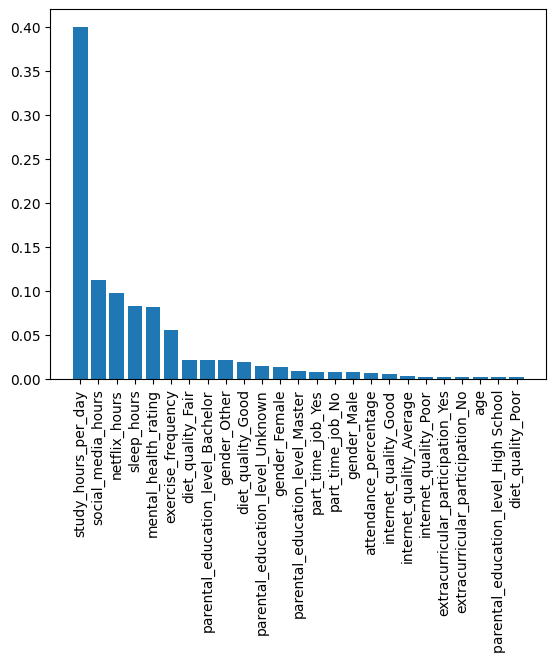

In [15]:
feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

### 2.2 Modèle de régeression Ridge

In [16]:
reg_ridge = Ridge()

In [17]:
reg_ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [18]:
y_pred = reg_ridge.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.18916436642335 ; MSE: 26.477325348577303 ; RMSE: 5.145612242345638


In [20]:
reg_ridge.score(X_test, y_test)

0.8967460176649482

23.77923052063994


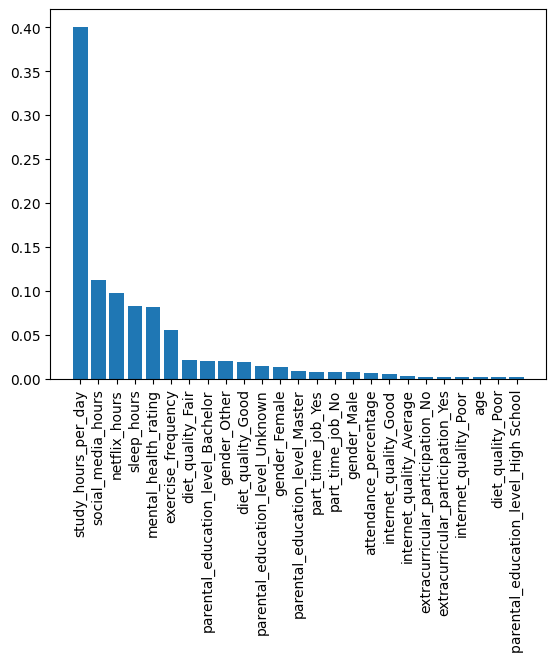

In [21]:
total_abs_coeff = sum(abs(reg_ridge.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_ridge.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_ridge.coef_[i])/total_abs_coeff})


def select_coeff(x):
    return x["coeff"]
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)

feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

### 2.3 Modèle de régression Lasso

In [22]:
reg_lasso = Lasso()

In [23]:
reg_lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [24]:
y_pred = reg_lasso.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.3125449078326 ; MSE: 28.799896023827777 ; RMSE: 5.366553458582871


In [26]:
reg_lasso.score(X_test, y_test)

0.8876886575155739

16.97511506313964


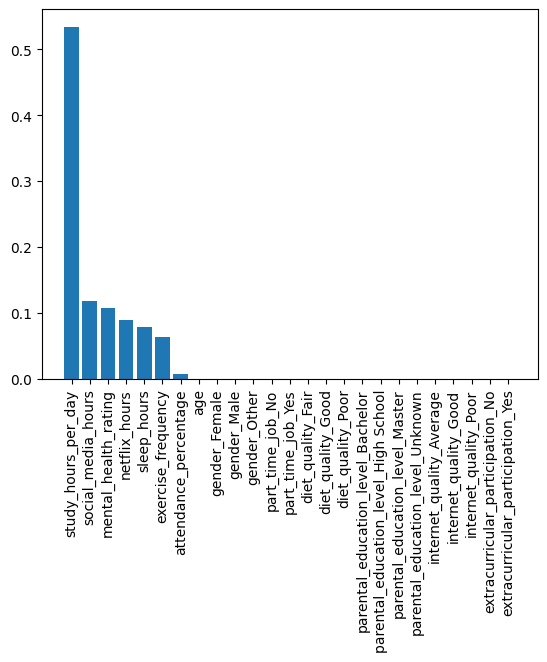

In [27]:
total_abs_coeff = sum(abs(reg_lasso.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_lasso.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_lasso.coef_[i])/total_abs_coeff})


def select_coeff(x):
    return x["coeff"]
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)

feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

## 3. Random Forest Regressor

### 3.1 Randorm Forest Regressor with 6 most significant features given by the 3 linear regressors

In [28]:
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [29]:
features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 
            'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

In [30]:
shpshort = shpml[features]
X = shpshort.drop(columns=['exam_score'])
y= shpshort['exam_score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
rfr = RandomForestRegressor()

In [32]:
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
y_pred = rfr.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.775339999999998 ; MSE: 35.77901841 ; RMSE: 5.981556520672525


In [35]:
rfr.score(X_test, y_test)

0.8604720799312103

### 3.2 Random Forest Regressor with full dataset

In [36]:
y = shpml.exam_score
X = shpml.drop(columns = ["id", "exam_score"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [37]:
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = rfr.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.956479999999998 ; MSE: 38.95343828999999 ; RMSE: 6.2412689647218365


In [40]:
rfr.score(X_test, y_test)

0.8480927519629052

##### La présélection des variables apparues comme les plus pertinentes lors des régressions linéaires a permis d'améliorer la performance de la régression par Random Forest

## 4. Utilisation de réduction dimensionnelle, PCA

Nous allons utiliser la PCA sur le dataset pour la régression linéaire classique et le régresseur par random forest. 
Comme ces variables sont à peu près du même ordre de grandeur, nous ne nous attendons pas à des progrès exceptionnels. 
De même nous pensons a priori que comme les modèles plus complexes sont en général moins sensibles à la réduction de dimension, la rendom forest devrait être moins impactée.
Nous allons séparer variables catégorielles et numériques du dataset pour n'opérer la pca que sur ces dernières.

In [41]:
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [42]:
num_feat = ['age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score']

shpml_short = shpml.drop(columns=['id'])
shpml_num = shpml_short[num_feat]
shpml_cat = shpml_short.drop(columns=num_feat)